In [36]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [37]:
taxis=pd.read_csv(r"C:\Users\pc\Desktop\__pycache__\seaborn-data\taxis.csv")
taxis


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [38]:
taxis.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [39]:
taxis.info()
taxis['payment']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


0       credit card
1              cash
2       credit card
3       credit card
4       credit card
           ...     
6428    credit card
6429    credit card
6430           cash
6431    credit card
6432    credit card
Name: payment, Length: 6433, dtype: object

In [40]:
#taxis[taxis['tip']=='credit card']

**5 NUMBER SUMMARY**

In [41]:
Q0 = np.quantile(taxis['total'],q=0) 
Q1 = np.quantile(taxis['total'],q=0.25)
Q2 = np.quantile(taxis['total'],q=0.50)
Q3 = np.quantile(taxis['total'],q=0.75)
Q4 = np.quantile(taxis['total'],q=1)

summary = {
    'Quartile':[Q0,Q1,Q2,Q3,Q4],
    'Statistic':['MINIMUM VAL','N/A','MEDIAN VAL','N/A','MAXIMUM VAL'],
    'Percentile':[0,25,50,75,100]
}
df = pd.DataFrame(summary)
df

,Quartile,Statistic,Percentile
0,1.30,MINIMUM VAL,0
1,10.80,N/A,25
2,14.16,MEDIAN VAL,50
3,20.30,N/A,75
4,174.82,MAXIMUM VAL,100


**OUTLIERS**

In [46]:
IQR = stats.iqr(taxis['total'])
UB = Q3+(1.5*IQR)  #upper_bound_price
LB = Q1-(1.5*IQR)  #lower_bound_price

**BOX AND WHISKERS PLOT**

<Axes: xlabel='pickup_borough', ylabel='total'>

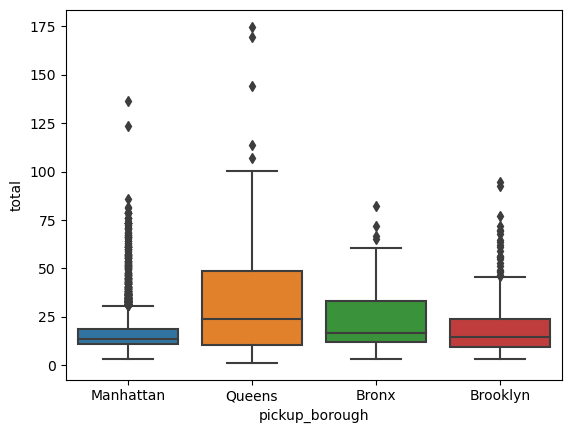

In [57]:
sns.boxplot(x=taxis['pickup_borough'],y=taxis['total'])

**Which pickup region has the fewest outliers, resulting in a more normally distributed dataset?**

<Axes: xlabel='pickup_borough', ylabel='total'>

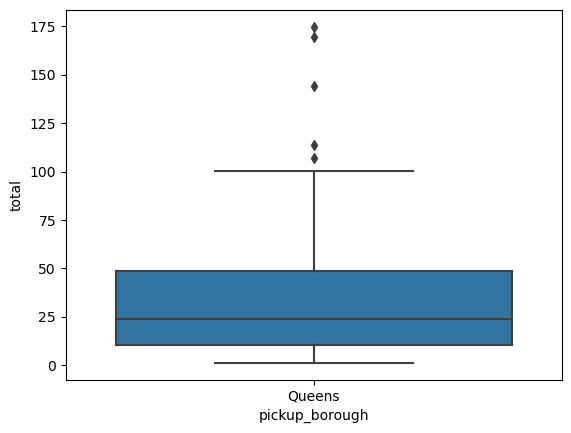

In [71]:
queens_pickups = taxis[taxis['pickup_borough'] == 'Queens']
sns.boxplot(x='pickup_borough', y='total', data=queens_pickups)

**Which pickup zone exhibits the lowest median total fare?**

<Axes: xlabel='pickup_borough', ylabel='total'>

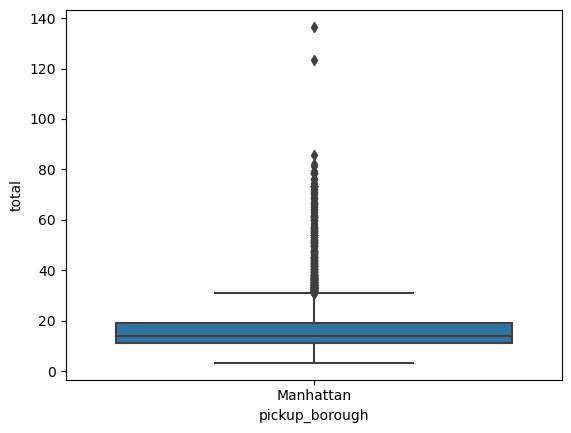

In [72]:
manhattan_pickups = taxis[taxis['pickup_borough'] == 'Manhattan']
sns.boxplot(x='pickup_borough', y='total', data=manhattan_pickups)

 **How does the total fare amount vary with the number of passengers?**

<Axes: xlabel='passengers', ylabel='total'>

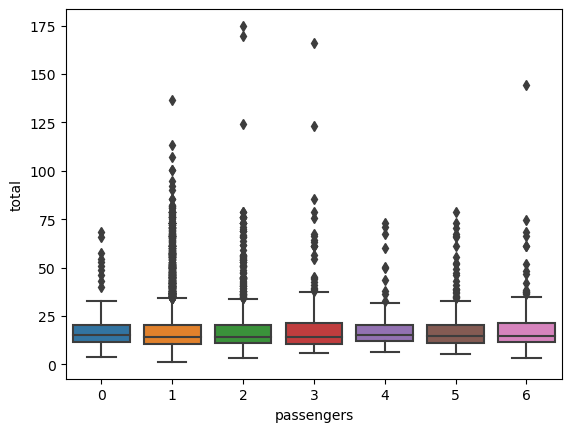

In [66]:
sns.boxplot(x='passengers', y='total', data=taxis)

**What is the median distance for trips with different numbers of passengers?**

<Axes: xlabel='passengers', ylabel='distance'>

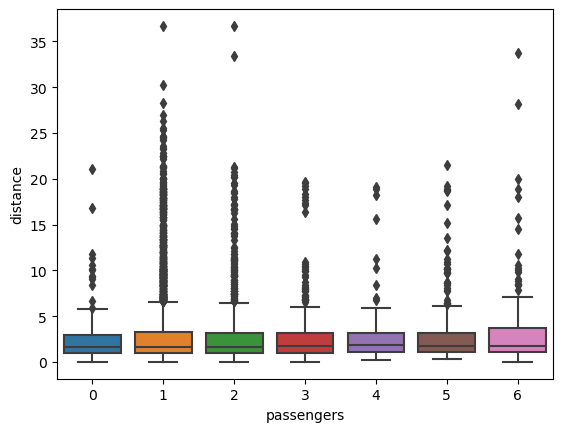

In [69]:
sns.boxplot(x='passengers', y='distance', data=taxis)

**How does the tip amount vary with the total number of passengers?**

<Axes: xlabel='passengers', ylabel='tip'>

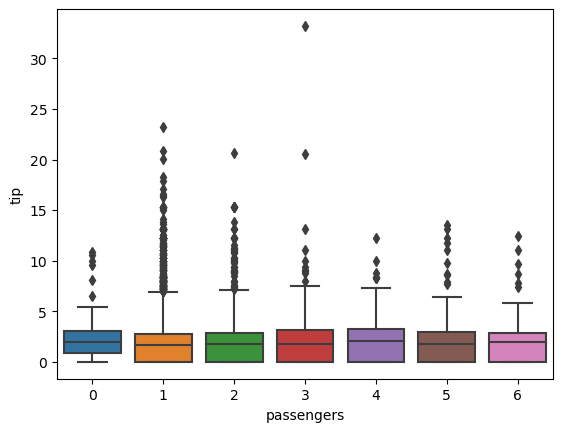

In [83]:
sns.boxplot(x='passengers', y='tip', data=taxis)


In [84]:
health_exp = pd.read_csv(r"C:\Users\pc\Desktop\__pycache__\seaborn-data\healthexp.csv")
health_exp

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [85]:
health_exp.describe()

,Year,Spending_USD,Life_Expectancy
count,274.000000,274.000000,274.000000
mean,1996.992701,2789.338905,77.909489
std,14.180933,2194.939785,3.276263
min,1970.000000,123.993000,70.600000
25%,1985.250000,1038.357000,75.525000
50%,1998.000000,2295.578000,78.100000
75%,2009.000000,4055.610000,80.575000
max,2020.000000,11859.179000,84.700000


In [86]:
health_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


**5 number summary** 

In [88]:
Q0 = np.quantile(health_exp['Spending_USD'],q=0) 
Q1 = np.quantile(health_exp['Spending_USD'],q=0.25)
Q2 = np.quantile(health_exp['Spending_USD'],q=0.50)
Q3 = np.quantile(health_exp['Spending_USD'],q=0.75)
Q4 = np.quantile(health_exp['Spending_USD'],q=1)

summary = {
    'Quartile':[Q0,Q1,Q2,Q3,Q4],
    'Statistic':['MINIMUM VAL','N/A','MEDIAN VAL','N/A','MAXIMUM VAL'],
    'Percentile':[0,25,50,75,100]
}
df = pd.DataFrame(summary)
df

,Quartile,Statistic,Percentile
0,123.993,MINIMUM VAL,0
1,1038.357,N/A,25
2,2295.578,MEDIAN VAL,50
3,4055.610,N/A,75
4,11859.179,MAXIMUM VAL,100


**OUTLIERS**

In [90]:
IQR = stats.iqr(health_exp['Spending_USD'])
UB = Q3+(1.5*IQR)  #upper_bound_price
LB = Q1-(1.5*IQR)  #lower_bound_price
print(UB)
print(LB)

8581.4895
-3487.5225


**BOX AND WHISKERS PLOT**

<Axes: xlabel='Country', ylabel='Spending_USD'>

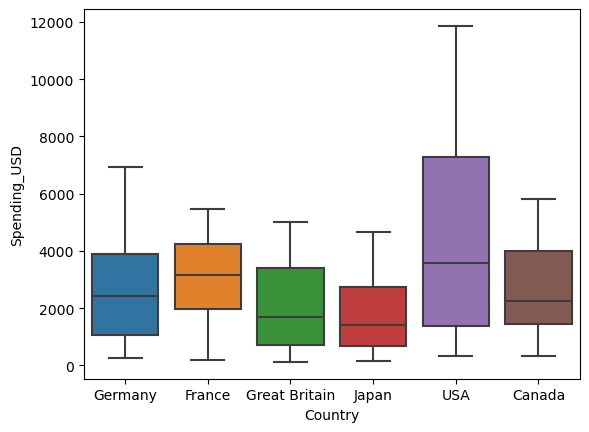

In [95]:
sns.boxplot(x='Country',y='Spending_USD',data = health_exp)

**Which country shows the greatest variation in life expectancy from 1970 to 2020?**

<Axes: xlabel='Country', ylabel='Year'>

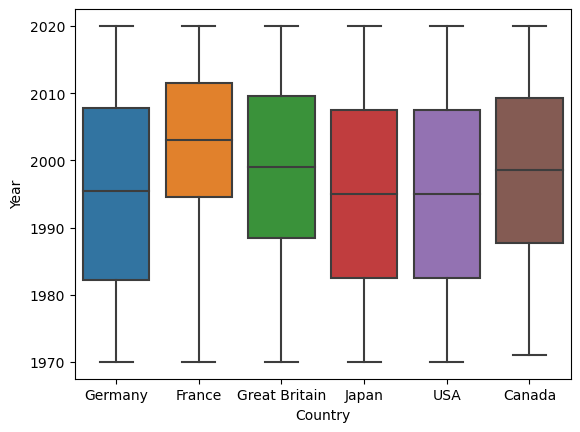

In [94]:
sns.boxplot(x='Country',y='Year',data = health_exp)